In [3]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

EXP_TYPE = 'sharpmin'
EXP_NAME = 'sharpmin'
# LIST_VALS = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
#              11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
#              31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

subdir_pattern = '*/*/eval.csv'  # This example finds all .txt files in all subdirectories

list_of_root_dirs_by_augment_degree = proc.generate_root_dirs_by_experiment_and_augment_degree_new(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='pendulum_swingup',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_dict = proc.load_datasets_by_directory(list_of_root_dirs_by_augment_degree, subdir_pattern, show=False)

In [4]:
for root_directory in list_of_root_dirs_by_augment_degree:
    print(root_directory, ' : ' ,len(datasets_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.1  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.2  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.3  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.4  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.5  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.6  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.7  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup/drqv2_aug_pixels-True-sharpmin-0.8  :  1
/Users/v

In [5]:
column_name = 'episode_reward'
result_stats = proc.generate_stats_for_directories(list_of_root_dirs_by_augment_degree, datasets_dict, column_name)
summary_statistics = proc.compute_summary_stats(result_stats)

# for key, stats in summary_statistics.items():
#     print(f"Directory: {key}")
#     print("Sum Statistics:", stats['Sum Statistics'])
#     print("Max Statistics:", stats['Max Statistics'])


print("\n...printing Mean over Sums")
mean_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Mean', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=True)

print("\n...printing Max over Sums")
max_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Max', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=True)



print("\n...printing Max over Maxes")
max_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Max', stat_type='Max Statistics')
sorted_items = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=True)

print("\n...printing Mean over Maxes")
mean_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Mean', stat_type='Max Statistics')
sorted_items = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=True)



...printing Mean over Sums
5.0: 1360.9000000000003
10.0: 1352.7
9.0: 1349.8000000000002
6.0: 1333.6999999999998
0.4: 1333.3000000000002
0.6: 1333.3
0.1: 1330.8999999999999
0.2: 1328.8000000000004
0.7: 1324.8000000000002
0.8: 1302.7
4.0: 1294.1999999999998
2.0: 1291.7
3.0: 1290.0
8.0: 1287.8
0.3: 1280.2
0.5: 1237.0
0.9: 1168.8000000000002
7.0: 1159.3000000000004
1.0: 1056.9

...printing Max over Sums
5.0: 1360.9000000000003
10.0: 1352.7
9.0: 1349.8000000000002
6.0: 1333.6999999999998
0.4: 1333.3000000000002
0.6: 1333.3
0.1: 1330.8999999999999
0.2: 1328.8000000000004
0.7: 1324.8000000000002
0.8: 1302.7
4.0: 1294.1999999999998
2.0: 1291.7
3.0: 1290.0
8.0: 1287.8
0.3: 1280.2
0.5: 1237.0
0.9: 1168.8000000000002
7.0: 1159.3000000000004
1.0: 1056.9

...printing Max over Maxes
4.0: 35.6
2.0: 35.2
3.0: 35.2
6.0: 35.1
0.3: 35.0
0.8: 34.9
8.0: 34.8
0.7: 34.5
0.4: 34.4
1.0: 33.3
0.9: 31.0
0.5: 30.9
7.0: 30.9
0.1: 30.3
0.6: 30.1
9.0: 30.1
5.0: 30.0
10.0: 30.0
0.2: 29.8

...printing Mean over Maxes

In [4]:
subdir_pattern = '*/*/augment.csv'
EXP_NAME = 'sharp'

list_of_root_dirs_by_augment_stats = proc.generate_root_dirs_by_experiment_and_augment_degree_new_augment_stats(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='pendulum_swingup_augment_stats',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_augstats_dict = proc.load_datasets_by_directory(
    list_of_root_dirs_by_augment_stats, subdir_pattern, show=False)


for root_directory in list_of_root_dirs_by_augment_stats:
    print(root_directory, ' : ' ,len(datasets_augstats_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-sharp-0.1  :  0
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-sharp-0.2  :  0
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-sharp-0.3  :  0
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-sharp-0.5  :  0
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-sharp-0.6  :  0
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-sharp-0.7  :  0
/Users/victor/Documents/python-projects/smart-rl/exp-sharpmin/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-sharp-0.8  :  0
/Users/victor/Documents/python-projects/smart-rl/exp-sh

In [11]:
stats_column_names = [
        "manhattan",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

sorted_mean_vals_over_sums_performance = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_sums_performance = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_mean_vals_over_max_performance = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_max_performance = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=False, print_it=False)


for distance in stats_column_names:
    result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, distance)
    mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
    sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

    print("\n", distance)
    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)
    print()



 manhattan
Pearson correlation coefficient (means over sums): 0.9502085996501749
Pearson correlation coefficient (maxes over sums): 0.9502085996501749
Pearson correlation coefficient (means over maxes): 0.0525522869446385
Pearson correlation coefficient (maxes over maxes): 0.0525522869446385


 kl_div
Pearson correlation coefficient (means over sums): nan
Pearson correlation coefficient (maxes over sums): nan
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


 hamming
Pearson correlation coefficient (means over sums): 0.949241105574114
Pearson correlation coefficient (maxes over sums): 0.949241105574114
Pearson correlation coefficient (means over maxes): 0.05122311034744304
Pearson correlation coefficient (maxes over maxes): 0.05122311034744304


 euclidian
Pearson correlation coefficient (means over sums): 0.9499677523563899
Pearson correlation coefficient (maxes over sums): 0.9499677523563899
Pearson correlation coeffici

/Users/victor/Documents/python-projects/smart-rl/notebooks/process_helper.py:22: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(y_values1, y_values2)


Pearson correlation coefficient (means over sums): 0.9499677523563899
Pearson correlation coefficient (maxes over sums): 0.9499677523563899
Pearson correlation coefficient (means over maxes): 0.05227362850650813
Pearson correlation coefficient (maxes over maxes): 0.05227362850650813


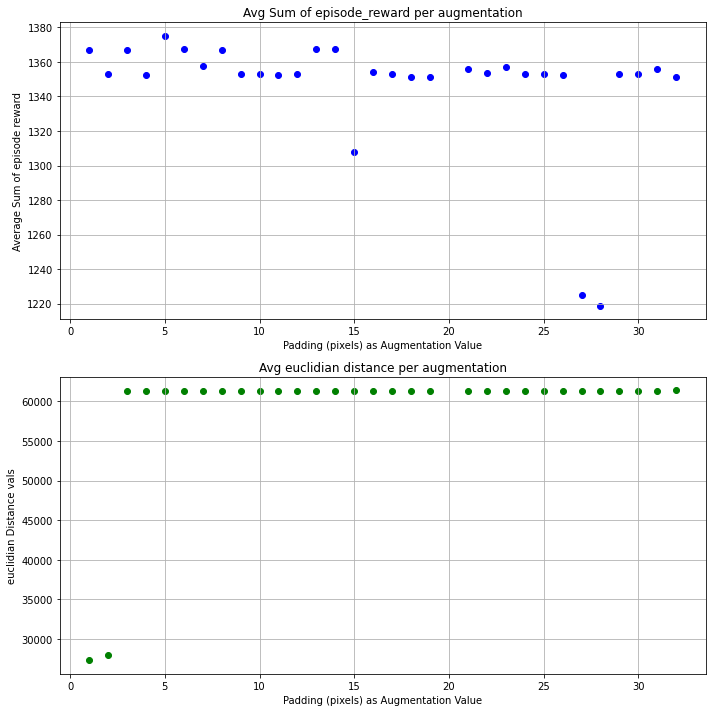

In [12]:
stats_distance_name = 'euclidian'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)



correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)


proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.9373106956053321
Pearson correlation coefficient (maxes over sums): 0.9373106956053321
Pearson correlation coefficient (means over maxes): 0.050717227790076175
Pearson correlation coefficient (maxes over maxes): 0.050717227790076175


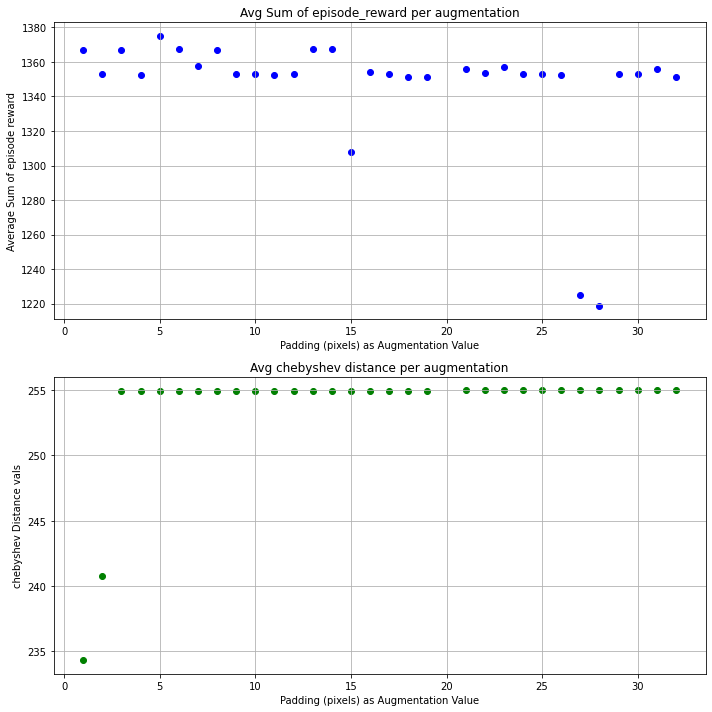

In [13]:
stats_distance_name = 'chebyshev'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)


correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.9641265611774358
Pearson correlation coefficient (maxes over sums): 0.9641265611774358
Pearson correlation coefficient (means over maxes): 0.155342985254824
Pearson correlation coefficient (maxes over maxes): 0.155342985254824


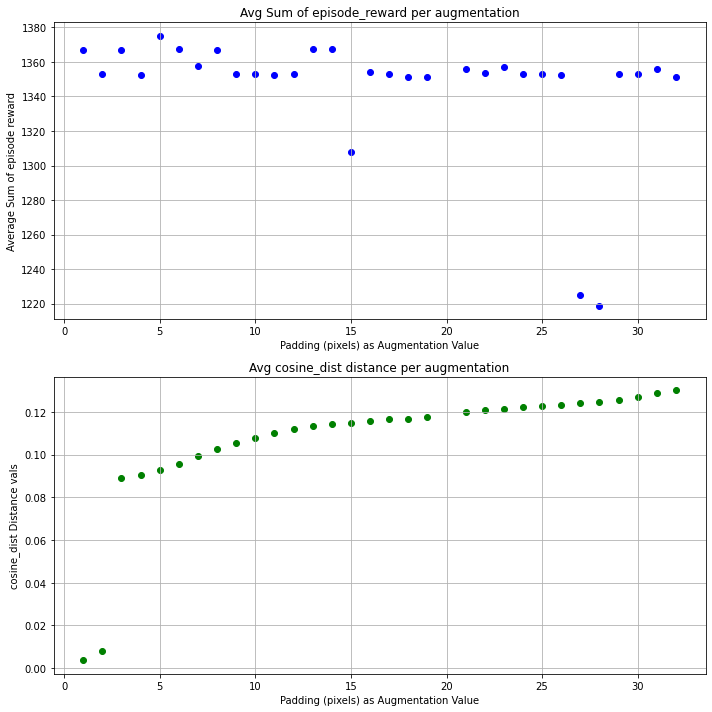

In [14]:
stats_distance_name = 'cosine_dist'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.966951172480123
Pearson correlation coefficient (maxes over sums): 0.966951172480123
Pearson correlation coefficient (means over maxes): 0.07935516981526877
Pearson correlation coefficient (maxes over maxes): 0.07935516981526877


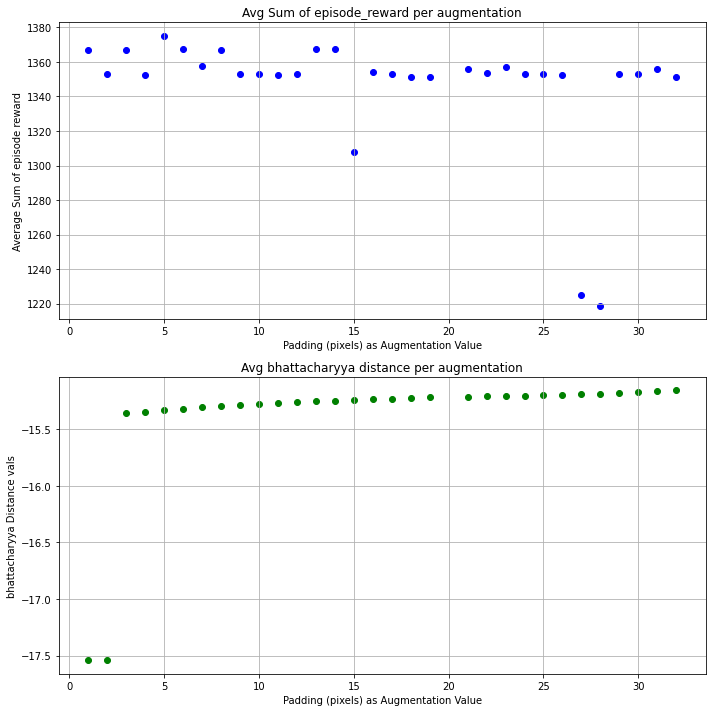

In [15]:
stats_distance_name = 'bhattacharyya'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.949241105574114
Pearson correlation coefficient (maxes over sums): 0.949241105574114
Pearson correlation coefficient (means over maxes): 0.05122311034744304
Pearson correlation coefficient (maxes over maxes): 0.05122311034744304


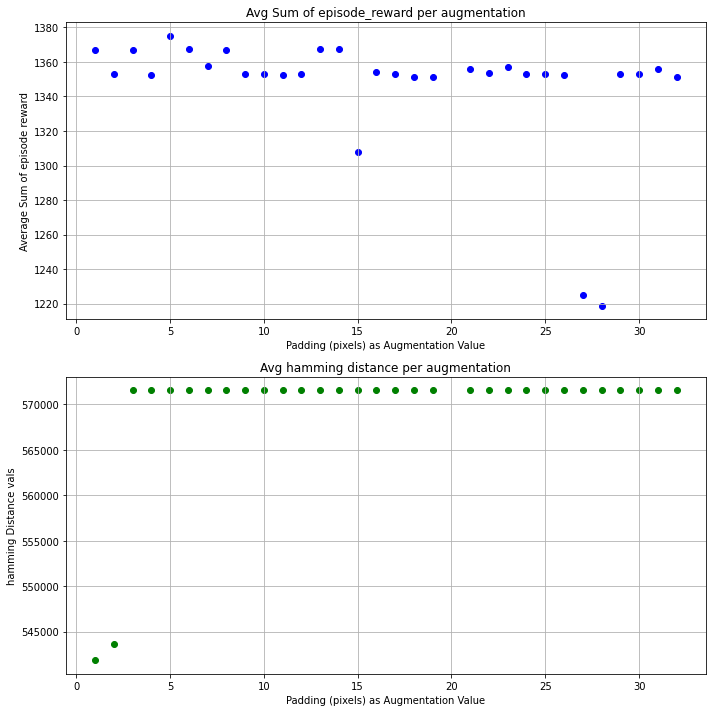

In [16]:
stats_distance_name = 'hamming'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): nan
Pearson correlation coefficient (maxes over sums): nan
Pearson correlation coefficient (means over maxes): nan
Pearson correlation coefficient (maxes over maxes): nan


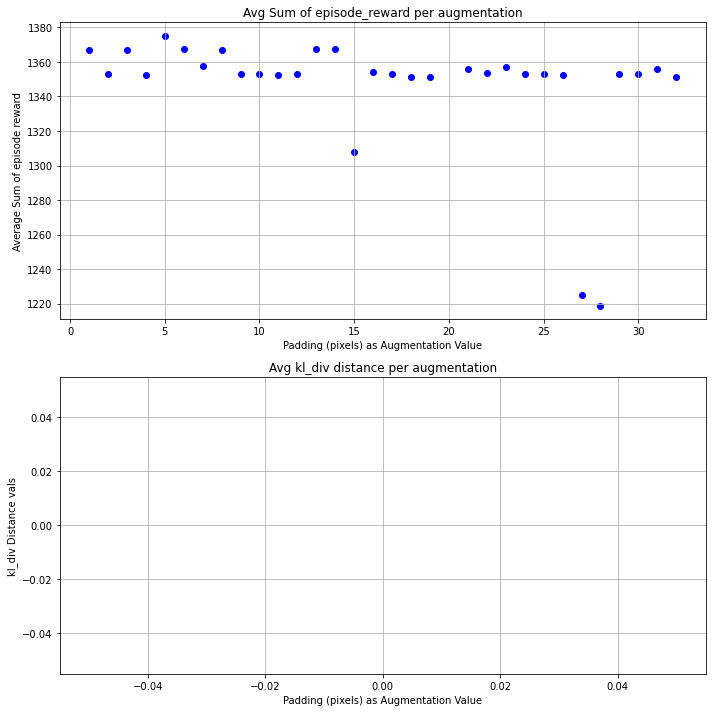

In [17]:
stats_distance_name = 'kl_div'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.9502085996501749
Pearson correlation coefficient (maxes over sums): 0.9502085996501749
Pearson correlation coefficient (means over maxes): 0.0525522869446385
Pearson correlation coefficient (maxes over maxes): 0.0525522869446385


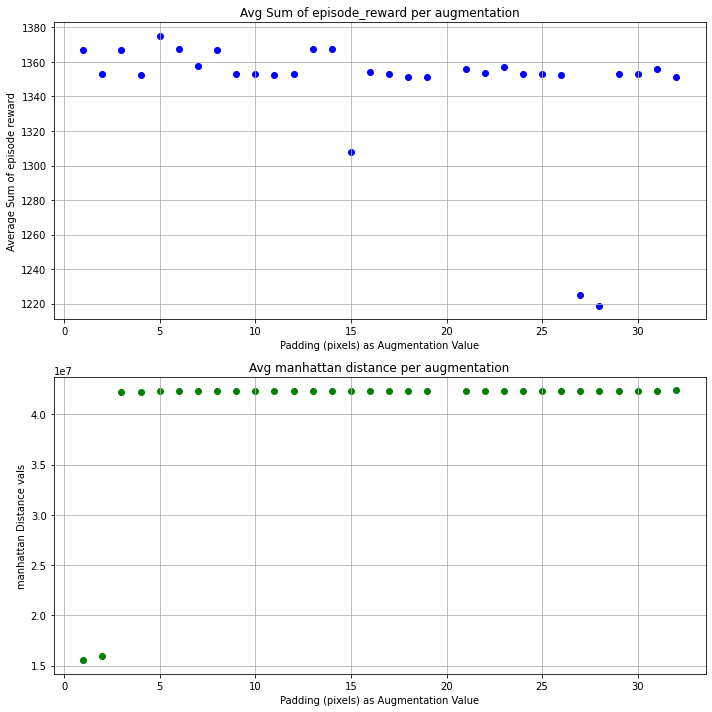

In [18]:
stats_distance_name = 'manhattan'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')